In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [50]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [51]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [52]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [53]:
df[df['isFraud'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


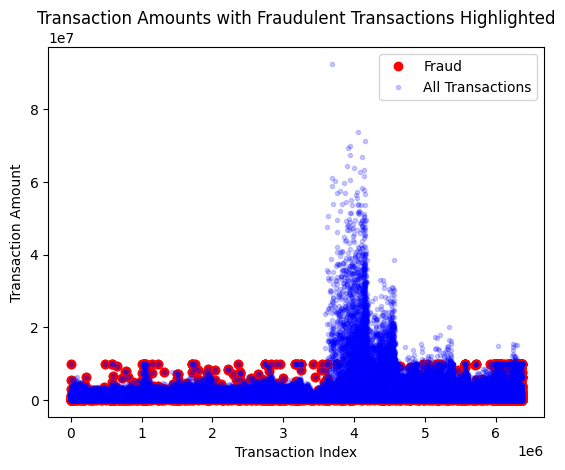

In [54]:
plt.plot(df[df["isFraud"]==1].index, df[df["isFraud"]==1]["amount"], 'ro', label='Fraud')

# Plot all transactions with different colors
plt.plot(df.index, df["amount"], 'b.', alpha=0.2, label='All Transactions')

plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount")
plt.legend()
plt.title("Transaction Amounts with Fraudulent Transactions Highlighted")
plt.show()

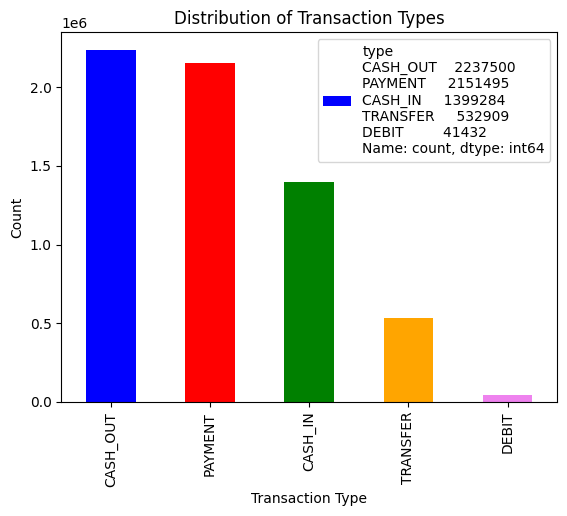

In [55]:
df["type"].value_counts().plot(kind="bar", color=['blue', 'red', 'green', 'orange',"violet"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.legend([df["type"].value_counts()])
plt.show()

## Overall Transaction Distribution:

- The majority of transactions fall under **CASH_OUT**, **PAYMENT**, and **CASH_IN**, with **CASH_OUT** being the most frequent.
- **TRANSFER** and **DEBIT** transactions occur significantly less often compared to other types.

In [56]:
df_fraud = df[df['isFraud'] == 1]


In [57]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [58]:
df_fraud['type'].value_counts()

,count
type,
CASH_OUT,4116
TRANSFER,4097


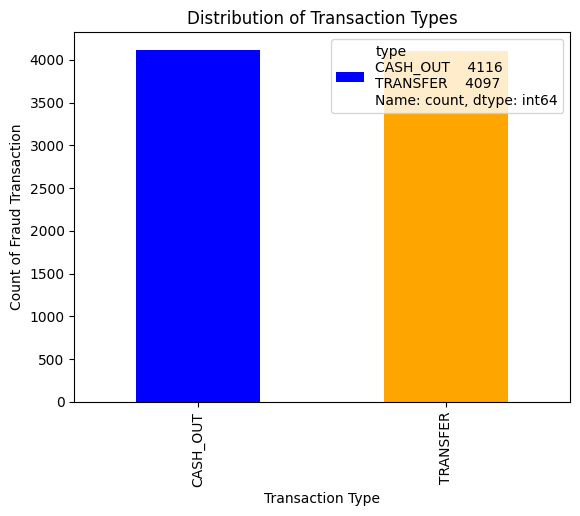

In [59]:
df_fraud["type"].value_counts().plot(kind="bar", color=['blue', 'orange'])
plt.xlabel("Transaction Type")
plt.ylabel("Count of Fraud Transaction")
plt.title("Distribution of Transaction Types")
plt.legend([df_fraud["type"].value_counts()])
plt.show()

## Fraudulent Transaction Distribution:

- Fraudulent activities predominantly occur in **CASH_OUT** and **TRANSFER** transactions.
- Notably, **PAYMENT, CASH_IN, and DEBIT** transactions show no fraudulent activity, suggesting that fraudulent patterns are more prevalent in cash-out and transfer transactions.


## Key Insights:

- Fraudsters may be exploiting **CASH_OUT** and **TRANSFER** mechanisms, possibly by attempting unauthorized withdrawals or fund transfers.
- Understanding these fraud-prone transaction types can help in designing targeted fraud detection strategies by applying machine learning models.


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [61]:
df.drop(['nameOrig','nameDest'],axis = 1, inplace = True)

In [62]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [63]:
df_Flag = df[df['isFlaggedFraud'] == 1]

In [64]:
df_Flag['isFraud'].value_counts()

,count
isFraud,
1,16


In [65]:
df['errorBalanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg
df['errorBalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest

In [66]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14


In [67]:
df = pd.get_dummies(df, columns=['type'], drop_first=True).astype(int)

In [68]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,170136,160296,0,0,0,0,0,9839,0,0,1,0
1,1,1864,21249,19384,0,0,0,0,0,1864,0,0,1,0
2,1,181,181,0,0,0,1,0,0,181,0,0,0,1
3,1,181,181,0,21182,0,1,0,0,21363,1,0,0,0
4,1,11668,41554,29885,0,0,0,0,0,11668,0,0,1,0


In [69]:

# making our independent set

Y = df['isFraud']

# removing the dependent set
X = df.drop(['isFraud'], axis = 1)

In [70]:
X.shape,Y.shape

((6362620, 13), (6362620,))

In [73]:
Y.value_counts()

,count
isFraud,
0,6354407
1,8213


In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resample, Y_resample = smote.fit_resample(X, Y.ravel())



<ipython-input-72-b64bd6cd8579>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_resample, Y_resample = smote.fit_resample(X, Y.ravel())


In [74]:
print(X_resample.shape, Y_resample.shape)

(12708814, 13) (12708814,)


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resample, Y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)


Shape of x_train:  (10167051, 13)
Shape of x_test:  (2541763, 13)
Shape of y_train:  (10167051,)
Shape of y_test:  (2541763,)


In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [78]:

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9992741615367489


In [82]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print("_"*50)
print("Confusion Matrix")

cm = confusion_matrix(y_test, y_pred)

print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269605
           1       1.00      1.00      1.00   1272158

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763

__________________________________________________
Confusion Matrix
[[1268844     761]
 [    326 1271832]]


In [83]:
# Save the model
model.save_model("xgboost_fraud_model.json")